# Image Classification using Convolutional Neural Networks (CNN) - X-ray Images
**Author**: Group 6 - Angela Nyaga,
                      Sophy Owuor and
                      Rowlandson Kariuki

# Overview

The aim of this project is to use deep learning models to to classify XRAY images as either belonging to a healthy patient or to a patient suffering from Pneumonia.The approach used involves combining advanced image processing and machine learning to develop a robust classification system.



# Business Understanding

In the realm of medical diagnostics, the detection of pneumonia through chest X-ray images poses a significant challenge, especially considering the limited availability of radiologists. The manual analysis of X-rays is time-consuming and relies heavily on the expertise of specialized professionals. This bottleneck can lead to delays in diagnosis and treatment, impacting patient outcomes. Consequently, there is a critical need for an automated and efficient solution that can accurately determine the presence or absence of pneumonia in X-ray images, mitigating the dependence on scarce human resources.

**Objectives**:


1.   Develop a Robust CNN Model:

Design and train a convolutional neural network (CNN) tailored for the nuances of chest X-ray images that can optimize the model's ability to discern pneumonia-related patterns.



2. Accurate Pneumonia Detection:

Train the model to accurately identify indicators of pneumonia in X-ray images.

3. Limited Radiologist Dependency:

Alleviate the strain on radiologist resources by creating a model capable of interpreting and analyzing X-rays without the need for specialized human expertise.

4. Timely Diagnosis and Treatment:

Accelerating the pneumonia diagnosis process through automated X-ray analysis can lead to quicker initiation of treatment, ultimately improving patient outcomes.
Resource Optimization:


# Setup

In [ ]:
# run on terminal or run this cell if using colab
!pip install split-folders
!pip install scikit-learn

In [ ]:
# importing necessary libraries
# Standard Libraries
import os

# Data Manipulation Libraries
import numpy as np
from PIL import Image

# Data Splitting and Preprocessing
import splitfolders
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.applications import VGG19
from keras.layers import concatenate

**Examining our directory structure and establishing the necessary file paths for upcoming tasks**

The original datset (CellData) upon download is divided into two folders: "train" and "test". Both the train and test folders contain two folders: one for "normal" xray images and the other for xray images showing patients with pneumonia.Because of the size of the data,computation is very heavy. Therefore, the following code to access the data has two alternatives. The first is if you have the data locally and your machine is capable of running this notebook without memory issues. The other is through google drive and google colab, which offers a GPU to aid in computation.

In [ ]:
# run this on jupyter
# Define the base directory path for chest X-ray images
# images_home = '/CellData/chest_xray/'

# Define directory paths for training, testing, and validation sets
# train_files = images_home + "train/"
# test_files = images_home + "test/"


In [ ]:
# run this if on colab
from google.colab import drive

# # Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the directory of the data
data_directory = '/content/drive/My Drive/CellData'

# unzip files
!unzip drive/My\ Drive/CellData/CellData.zip

# Define the base directory path for chest X-ray images
images_home = "/content/CellData/chest_xray/"

# Define directory paths for training, testing, and validation sets
train_files = images_home + "train/"
test_files = images_home + "test/"

Streaming output truncated to the last 5000 lines.
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3411116-0002.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3411116-0003.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3444356-0001.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3448549-0001.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3476904-0001.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3482198-0001.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3482198-0002.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3482198-0003.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3482198-0004.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3486729-0001.jpeg  
  inflating: train_files/val_files/train_resized/NORMAL/NORMAL-3487615-0001.jpeg  
  inflating: train_files/val_files/t

# Exploratory Analysis (EDA) and Data Preparation

In [ ]:
# Print the list of filenames in the training directory
print(os.listdir(train_files))

['PNEUMONIA', 'NORMAL']


In [ ]:
# Define directory paths for normal and pneumonia training images
train_norm = train_files+"NORMAL/"
train_sick = train_files+"PNEUMONIA/"

# Define directory paths for normal and pneumonia training images
test_norm = test_files+"NORMAL/"
test_sick = test_files+"PNEUMONIA/"

In [ ]:
# Print the number of images in the normal and pneumonia training directories
print("Number of normal training images is : ", len(os.listdir(train_norm)))
print("Number of sick training images is : ", len(os.listdir(train_sick)))
print("Number of normal testing images is : ", len(os.listdir(test_norm)))
print("Number of sick testing images is : ", len(os.listdir(test_sick)))

Number of normal training images is :  1349
Number of sick training images is :  3883
Number of normal testing images is :  234
Number of sick testing images is :  390


The current directory structure lacks a set of images that we can use to validate during the modelling process. A validation set helps in tuning hyperparameters and preventing overfitting. It is different from the test set, which is reserved for final model analysis. Because the training set of images contains more images, we will use a subset of it to create a validation set. We will use split folders library because of the simplicity of use.


In [ ]:
# Run this cell only once
# Taking images from the train folder

# input_folder = train_files
# output_folder = "train_files/val_files"

# # Specify the split ratios
# split_ratios = (0.7, 0.3)

# # Perform the split
# splitfolders.ratio(input_folder, output_folder, seed=42, ratio=split_ratios, group_prefix=None)

The path to our directory has changed with the split. We therefore need to redefine the path to our train dataset and our newly created validation dataset.

In [ ]:
# specifying path to newly created train and validation set
train_files = "train_files/val_files/train/"
train_norm = train_files +"NORMAL/"
train_sick = train_files +"PNEUMONIA/"

val_files = "train_files/val_files/val/"
val_norm = val_files +"NORMAL/"
val_sick = val_files +"PNEUMONIA/"

# Inspecting how many images are left in the training set and how many are in the val set
print("No of normal train images after split is:", len(os.listdir(train_norm)))
print("No of sick train images after split is:",len(os.listdir(train_sick)))

print("No of normal val images is:", len(os.listdir(val_norm)))
print("No of sick val images is:", len(os.listdir(val_sick)))

No of normal train images after split is: 944
No of sick train images after split is: 2718
No of normal val images is: 405
No of sick val images is: 1165


The split was successful. However, with 944 normal images and 2718 "sick"images in the training dataset.

**Investigating the characteristics of our images**

Text(0.5, 1.0, 'Pneumonia')

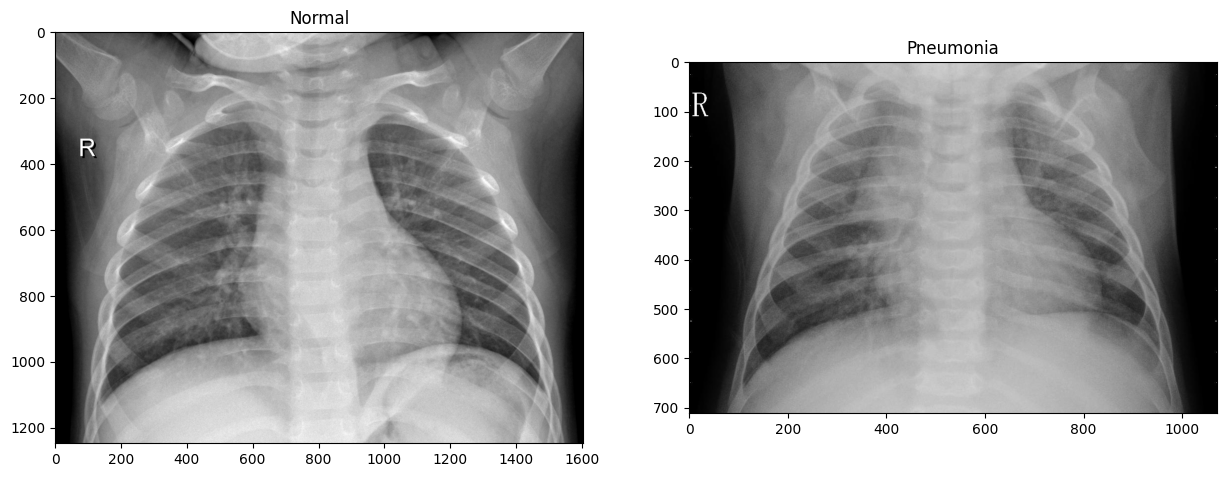

In [ ]:

# Select the 41st image from the normal and pneumonia training directories
norm_pic_file = os.listdir(train_norm)[79]
sick_pic_file = os.listdir(train_sick)[88]

# Build full file paths for the selected images
norm_pic_full_filename = train_norm + norm_pic_file
sick_pic_full_filename = train_sick + sick_pic_file

# Load and convert the selected images to binary (black and white)
pic_norm = Image.open(norm_pic_full_filename).convert('L')
pic_sick = Image.open(sick_pic_full_filename).convert('L')

# Create a figure for side-by-side visualization of the normal and pneumonia images
f = plt.figure(figsize=(15,15))
a_norm = f.add_subplot(1,2,1)
img_plot = plt.imshow(pic_norm,cmap="gray")
a_norm.set_title("Normal")

a_sick = f.add_subplot(1,2,2)
img_plot = plt.imshow(pic_sick,cmap="gray")
a_sick.set_title("Pneumonia")

There exists a disparity in the sizes of the images, indicating a potential imbalance.

In [ ]:
# confirming that the images are of different sizes
print(pic_norm.size)
print(pic_sick.size)

(1604, 1248)
(1072, 712)


We need to standardize the images by resizing them. CNN will only accept inputs that have fixed sizes. Furthermore, resizing ensures that when modelling, our input has consistent features and patterns, therefore reducing the chances of overfitting. We will create a new directory for the resized images as opposed to overwriting the original images. Though the latter is more efficient, it will lead to loss of original data, which may be needed for future comparison.


In [ ]:
#run only once
#  Target size based on the images above
# target_size = (1000,1000)

# we want to resize both the normal and pneumonia images in the train files
# variable "train norm" contains directory path to where all the normal train images are found
# Get a list of all normal train image files in the directory
# normal_train_list = os.listdir(train_norm)

# Create a new directory to store resized images
# resized_images_directory = "train_files/val_files/train_resized/NORMAL/"
# os.makedirs(resized_images_directory, exist_ok=True)

# Resize each normal image and save it to the new directory
# for image_file in normal_train_list:
    # image_path = os.path.join(train_norm, image_file)
    # resized_image = Image.open(image_path).resize(target_size)

    # Save the resized image to the new directory
    # resized_image_path = os.path.join(resized_images_directory, image_file)
    # resized_image.save(resized_image_path)

In [ ]:
# variable "train sick" contains directory path to where all the sick train images are found
# Get a list of all "sick" train image files in the directory
# sick_train_list = os.listdir(train_sick)

# Create a new directory to store resized images
# resized_images_directory = "train_files/val_files/train_resized/PNEUMONIA/"
# os.makedirs(resized_images_directory, exist_ok=True)

# Resize each normal image and save it to the new directory
# for image_file in sick_train_list:
    # image_path = os.path.join(train_sick, image_file)
    # resized_image = Image.open(image_path).resize(target_size)

    # Save the resized image to the new directory
    # resized_image_path = os.path.join(resized_images_directory, image_file)
    # resized_image.save(resized_image_path)

In [ ]:
# specifying path to the new set of resized train images
train_files_resized = "train_files/val_files/train_resized/"
train_norm_resized = train_files_resized +"NORMAL/"
train_sick_resized = train_files_resized +"PNEUMONIA/"

Text(0.5, 1.0, 'Pneumonia')

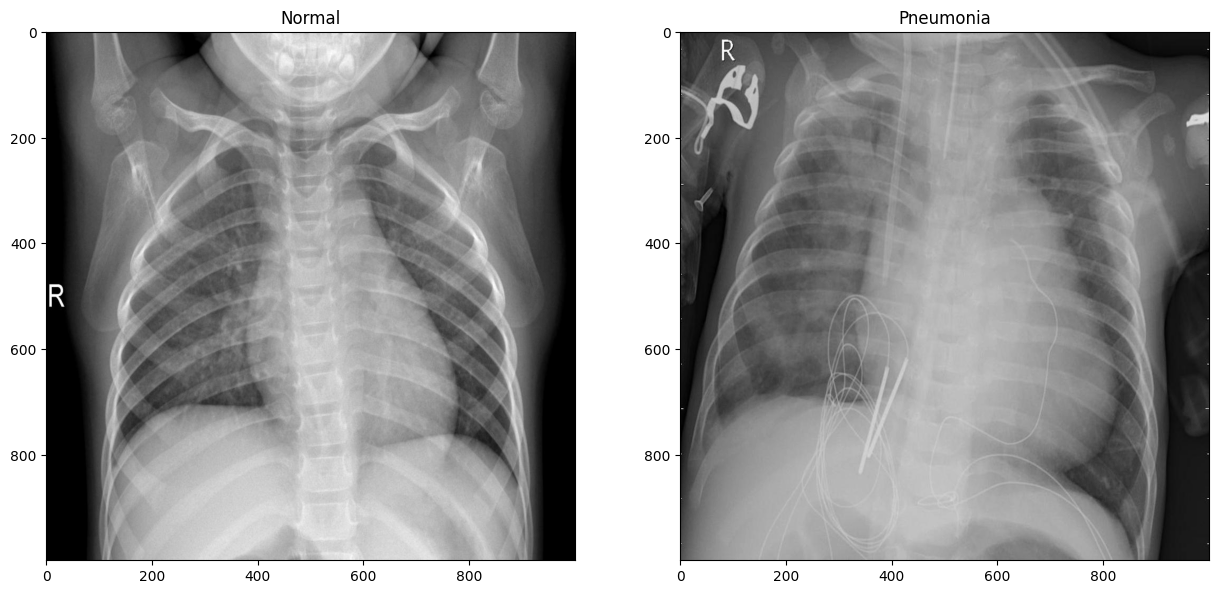

In [ ]:
# Using the same code above to visually inspect whether our images have been resized
# Select random images from the normal and pneumonia training directories
norm_pic_file = os.listdir(train_norm_resized)[40]
sick_pic_file = os.listdir(train_sick_resized)[105]

# Build full file paths for the selected images
norm_pic_full_filename = train_norm_resized + norm_pic_file
sick_pic_full_filename = train_sick_resized + sick_pic_file

# Load and convert the selected images to binary (black and white)
pic_norm = Image.open(norm_pic_full_filename).convert("L")
pic_sick = Image.open(sick_pic_full_filename).convert("L")

# Create a figure for side-by-side visualization of the normal and pneumonia images
f = plt.figure(figsize=(15,15))
a_norm = f.add_subplot(1,2,1)
img_plot = plt.imshow(pic_norm,cmap="gray")
a_norm.set_title("Normal")

a_sick = f.add_subplot(1,2,2)
img_plot = plt.imshow(pic_sick,cmap="gray")
a_sick.set_title("Pneumonia")

In [ ]:
# confirming resizing
print(pic_norm.size)
print(pic_sick.size)

(1000, 1000)
(1000, 1000)


**Data Augmentation**

**Examing the pixel values of our images**

In [ ]:
# Convertimage to a NumPy array to access pixel values
pixel_values_norm = list(pic_norm.getdata())
pixel_values_sick = list(pic_sick.getdata())

# Display the pixel values
print("Pixel values before rescaling:", pixel_values_norm[500:550])
print("Pixel values before rescaling:", pixel_values_sick[1000:1050])

Pixel values before rescaling: [203, 197, 195, 197, 201, 200, 200, 200, 201, 200, 197, 195, 191, 189, 188, 190, 196, 203, 210, 214, 218, 216, 214, 214, 215, 217, 217, 217, 225, 225, 226, 224, 221, 216, 211, 208, 210, 212, 216, 219, 220, 221, 220, 219, 211, 213, 217, 219, 220, 221]
Pixel values before rescaling: [23, 21, 18, 16, 17, 19, 22, 24, 27, 32, 39, 43, 43, 42, 41, 40, 48, 45, 41, 39, 39, 40, 42, 43, 46, 47, 48, 48, 48, 47, 47, 46, 49, 51, 51, 49, 45, 43, 44, 45, 48, 49, 51, 52, 51, 50, 47, 46, 50, 49]


We need to normalize our pixel values. Normalizing them will lead to better performance of our neural network and will also increase the computational efficiency. This will be done by passing our data through Image Data Generator. Furthermore, we will apply various transformations, including rotation, to our train set. Creating variations in our train set will present our model with slightly modified verisons of training data and consequently help it to become more robust

In [ ]:
# create geenrator object for train set
train_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                     ).flow_from_directory(train_files_resized,
                                                    target_size=(700,700),
                                                    batch_size=32,shuffle=False)

# create geenrator object for val set
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_files, target_size=(700,700),
                                                    batch_size = 32,shuffle=False)

# # create geenrator object for test set
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_files, target_size=(700,700),
                                                    batch_size = 32,shuffle=False)

Found 3662 images belonging to 2 classes.
Found 1570 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# extract a batch of our data from generator object
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)


In [ ]:
# explore dataset after extraction
print("Train images shape:", train_images.shape)
print("Val images shape:", val_images.shape)
print("Test images shape:", test_images.shape)

print("Train labels shape:", train_labels.shape)
print("Val labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (32, 700, 700, 3)
Val images shape: (32, 700, 700, 3)
Test images shape: (32, 700, 700, 3)
Train labels shape: (32, 2)
Val labels shape: (32, 2)
Test labels shape: (32, 2)


The labels to our dataset are as we expect, with each set of data (train,val,set) containing 2 labels: Normal and Pneumonia.
Because of the size of the dataset, we could not process and extract the images in batches larger than 500. However, the shape of all our sets of images are still as we expect, with the given size.  Although the shape shows that our images are in RBG, we will maintain the images in 3 color channels because our models only accepts 3 channels for input shape.

# Modelling

# Baseline Model VGG16

In this project, we've chosen the VGG16 model as our baseline for image classification. The pre-trained VGG16 model is a convolutional neural network (CNN) architecture that has been trained on a large dataset. Renowned for its simplicity and effectiveness, VGG16 comes pre-trained on the ImageNet dataset, offering a solid foundation for our specific task. Leveraging transfer learning, we aim to capitalize on its learned features and subsequently fine-tune the model on our dataset to achieve optimal performance in classifying images

In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(700, 700, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create custom model on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


Training the Model. This involves fitting the model to the training data.

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)



Epoch 1/10
114/114 [==============================] - 652s 5s/step - loss: 22.5408 - accuracy: 0.7226 - val_loss: 0.3777 - val_accuracy: 0.8323
Epoch 2/10
114/114 [==============================] - 625s 5s/step - loss: 0.7587 - accuracy: 0.8039 - val_loss: 0.3100 - val_accuracy: 0.8406
Epoch 3/10
114/114 [==============================] - 610s 5s/step - loss: 0.3962 - accuracy: 0.8105 - val_loss: 0.2588 - val_accuracy: 0.8878
Epoch 4/10
114/114 [==============================] - 597s 5s/step - loss: 0.5540 - accuracy: 0.7837 - val_loss: 0.2917 - val_accuracy: 0.9050
Epoch 5/10
114/114 [==============================] - 596s 5s/step - loss: 0.3884 - accuracy: 0.8077 - val_loss: 0.2434 - val_accuracy: 0.9011
Epoch 6/10
114/114 [==============================] - 613s 5s/step - loss: 0.5120 - accuracy: 0.7722 - val_loss: 2.5716 - val_accuracy: 0.7417
Epoch 7/10
114/114 [==============================] - 624s 5s/step - loss: 0.3951 - accuracy: 0.7799 - val_loss: 0.3028 - val_accuracy: 0.854

In [ ]:
model.save('xray_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate model on the test set
evaluation = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

19/19 [==============================] - 25s 1s/step - loss: 0.3157 - accuracy: 0.8816
Test Loss: 0.3157232105731964
Test Accuracy: 0.8815789222717285


The evaluation results demonstrate strong model performance on the test set. With a test loss of 0.3157, indicating effective predictive capabilities, and a test accuracy of 88.16%, the model exhibits robust generalization to previously unseen data. The low loss value suggests precise predictions, while the high accuracy underscores the model's efficacy in correctly classifying test images. These results affirm the model's proficiency in the specific binary classification task, showcasing its ability to provide accurate and reliable predictions.

20/20 [==============================] - 31s 2s/step


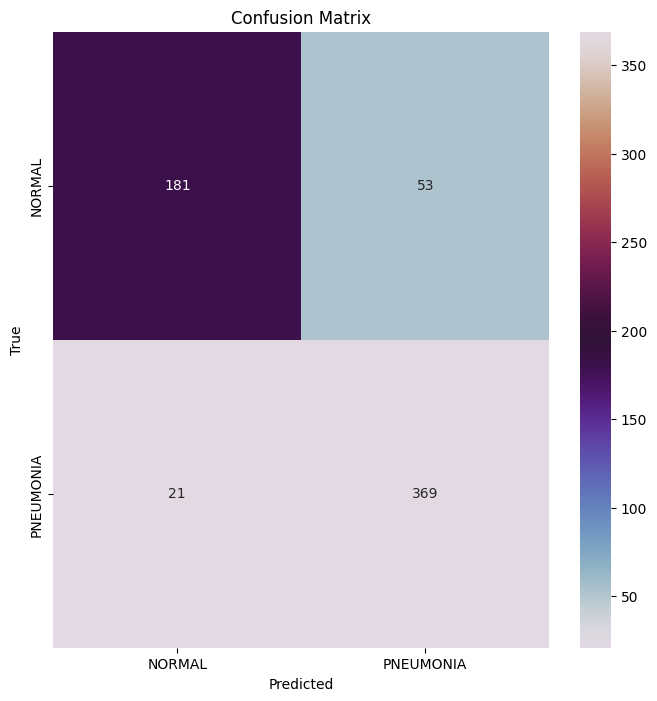

In [ ]:
# Make Predictions
# use np.ceil to ensure no data is being cut off due to batch size
predictions = model.predict(test_generator, steps= int (np.ceil(test_generator.samples / test_generator.batch_size)))


# Convert Predictions and True Labels to Classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Instantiate Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot Confusion Matrix
class_labels = list(test_generator.class_indices.keys())
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='twilight', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix indicates that our model performed well in correctly identifying cases of pneumonia (369 true positives) but exhibited some misclassifications. Specifically, there were 53 false positives, where the model incorrectly predicted pneumonia when the actual condition was normal. Additionally, there were 21 false negatives, where the model failed to identify pneumonia when it was present. The 181 true negatives indicate accurate predictions of normal cases. Overall, the model demonstrates effectiveness in detecting pneumonia, but there is room for improvement, particularly in reducing false positives and false negatives.

Visualizing Training History:

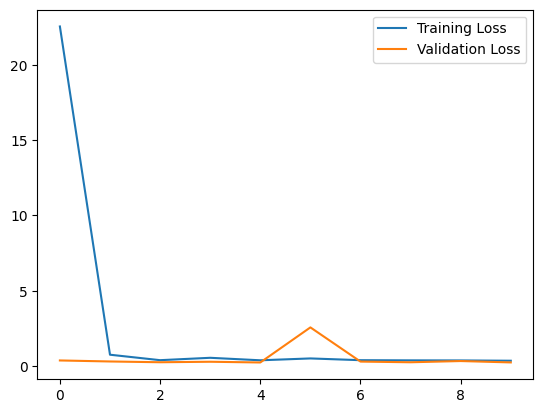

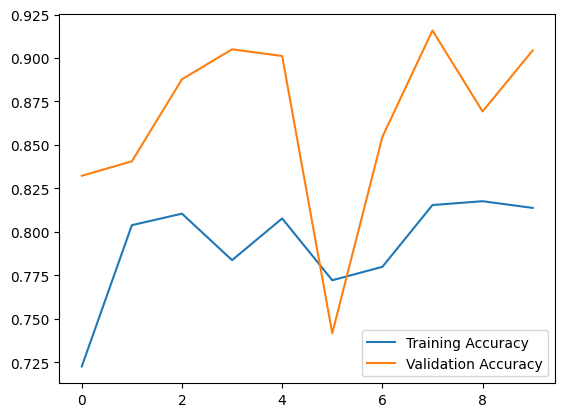

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

The performance of our model, as assessed through accuracy and loss metrics during training, exhibits a strong alignment with validation scores at each step. This indicates a consistent and effective learning process, where the model's behavior on the training dataset closely mirrors its performance on an independent validation dataset. Such congruence suggests that our model generalizes well to unseen data, reflecting a robust and reliable predictive capability. The close correspondence between training and validation metrics underscores the model's overall proficiency and reliability in making accurate predictions.

# Model 2- VGG19

In our project, the second model in our arsenal is the VGG19 architecture, which serves as an upgraded version of the VGG16 model. While both models share the same fundamental principles, VGG19 features an additional set of convolutional layers, resulting in a deeper neural network with 19 layers. This augmentation introduces a potential increase in representational capacity but also demands more computational resources during training and inference compared to its predecessor. By opting for VGG19, we aim to explore the benefits of a deeper architecture and assess its impact on the model's performance in our image classification task, considering the trade-off between increased complexity and computational efficiency.since our images are grayscale the model was adjusted to fit to that.

In [ ]:
# Load the pre-trained VGG19 model
cnn_base = VGG19(weights='imagenet', include_top=False, input_shape=(700, 700, 3))

# Freeze the convolutional layers
for layer in cnn_base.layers:
    layer.trainable = False

# Create custom model on top of the pre-trained model
model = models.Sequential()
model.add(cnn_base)

# Continue building the rest of your model
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))



# Display the model summary
model.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 21, 21, 512)       20024384  
                                                                 
 flatten (Flatten)           (None, 225792)            0         
                                                                 
 dense (Dense)               (None, 64)                14450752  
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                         

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy',  # Binary classification loss
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

# Fitting the Model
history = model.fit(train_generator,
                    steps_per_epoch= train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // val_generator.batch_size)

Epoch 1/10
114/114 [==============================] - 664s 6s/step - loss: 0.6150 - acc: 0.7399 - val_loss: 0.5271 - val_acc: 0.7417
Epoch 2/10
114/114 [==============================] - 640s 6s/step - loss: 0.5042 - acc: 0.7438 - val_loss: 0.4656 - val_acc: 0.7417
Epoch 3/10
114/114 [==============================] - 645s 6s/step - loss: 0.4140 - acc: 0.8118 - val_loss: 0.5184 - val_acc: 0.7417
Epoch 4/10
114/114 [==============================] - 620s 5s/step - loss: 0.3659 - acc: 0.8317 - val_loss: 0.3961 - val_acc: 0.8431
Epoch 5/10
114/114 [==============================] - 614s 5s/step - loss: 0.3314 - acc: 0.8493 - val_loss: 0.3621 - val_acc: 0.8495
Epoch 6/10
114/114 [==============================] - 626s 5s/step - loss: 0.3036 - acc: 0.8645 - val_loss: 0.4046 - val_acc: 0.8170
Epoch 7/10
114/114 [==============================] - 681s 6s/step - loss: 0.2976 - acc: 0.8719 - val_loss: 0.3163 - val_acc: 0.8578
Epoch 8/10
114/114 [==============================] - 636s 6s/step - 

In [ ]:
#save model
model.save('results_second_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate model on the test set
evaluation = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

19/19 [==============================] - 33s 2s/step - loss: 0.3852 - acc: 0.8158
Test Loss: 0.3851935863494873
Test Accuracy: 0.8157894611358643


Our model demonstrates commendable performance on the test set, achieving a test loss of 0.3852 and an accuracy of 81.58%. This signifies that the model effectively minimized errors during prediction, with the majority of test images correctly classified. While there's room for improvement, these results indicate a robust and reliable performance in the targeted classification task.

20/20 [==============================] - 46s 2s/step


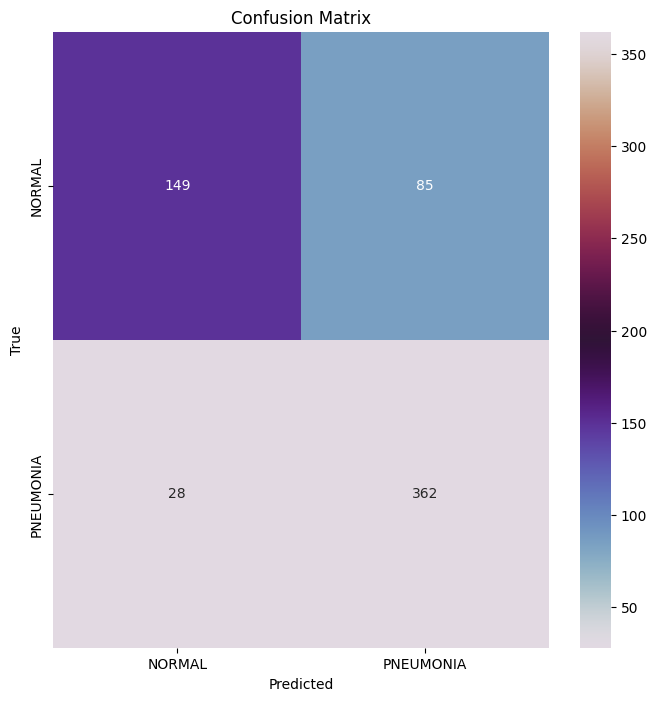

In [ ]:
# Make Predictions
# use np.ceil to ensure no data is being cut off due to batch size
predictions = model.predict(test_generator, steps= int (np.ceil(test_generator.samples / test_generator.batch_size)))


# Convert Predictions and True Labels to Classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Instantiate Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot Confusion Matrix
class_labels = list(test_generator.class_indices.keys())
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='twilight', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix reveals that our model performs well in identifying pneumonia cases with 362 true positives, indicating accurate predictions. However, there are 85 false positives, where the model wrongly predicts pneumonia in normal cases, and 28 false negatives, representing instances where the model fails to identify pneumonia when it's present. The 149 true negatives correctly identify normal cases. Overall, while the model excels in pneumonia detection, there is room for improvement in reducing false positives and false negatives.

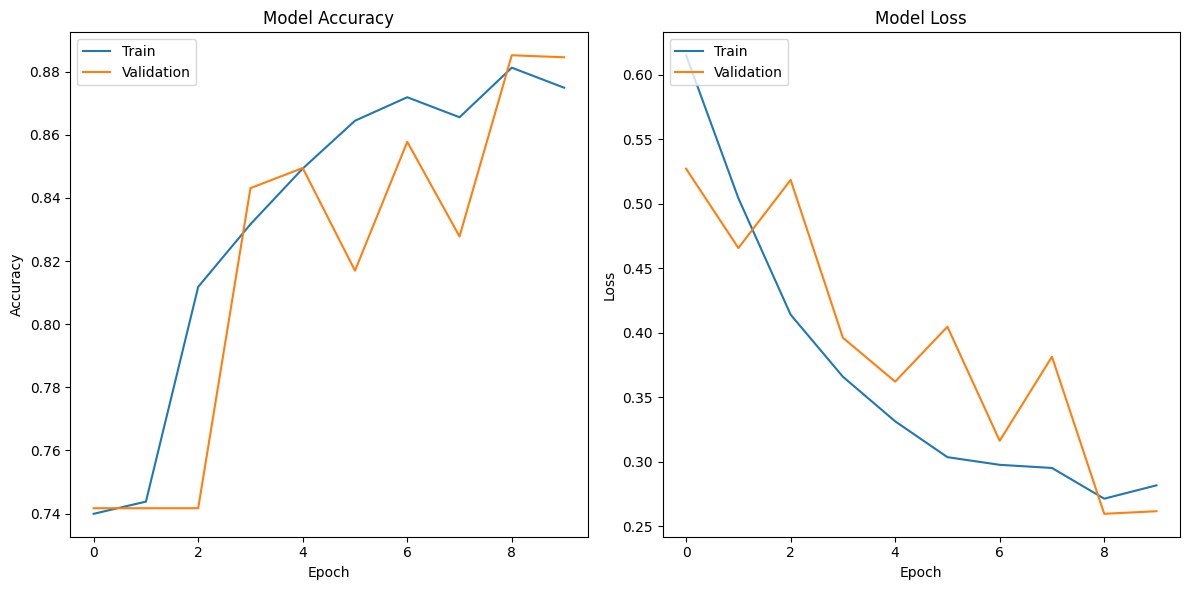

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

The training accuracy and loss curves consistently provide strong performance, yielding favorable scores throughout the training process. Notably, the validation scores closely align with the training scores at each step, indicating a robust and reliable learning process. This coherence suggests that our model generalizes well to unseen validation data, demonstrating consistent accuracy and effective loss reduction. The convergence of training and validation metrics implies that our model is learning efficiently without overfitting or underfitting, contributing to its overall effectiveness in the learning task.

# Conclusion

In assessing the baseline model and Model 2, both demonstrate commendable performances, with the baseline achieving an impressive 88.16% test accuracy and 0.3157 test loss, and Model 2 achieving an 81.58% accuracy with a 0.3852 test loss. While the baseline model initially appears superior, it's essential to consider the nuanced trade-off between accuracy and training time. The shared confusion matrices between the two models indicate consistent strengths in correctly identifying true positives and true negatives. Model 2, despite a marginally lower accuracy, maintains competitiveness and showcases potential for improvement through fine-tuning and optimization. This positive outlook suggests that both models hold promise, with opportunities for refinement to achieve even greater effectiveness in the targeted classification task.

# Limitations and Next Steps

The major contraint faced in this project is access to computation resources. Because of the limitations of our personal computers, we chose to utilise free GPU resources. Furthermore, we chose to run two models on our full data as opposed to a subset of our data so as to get the most accurate results. However, because of the size of our data, this tradeoff meant that we could only get limited access to free GPU reources. We therefore recommend the following next steps:


*   Increase the batch sizes when the data is being passed through Image Data Generator. Again, because of limited memory, we could only pass our data in batch sizes of 32. This may have introduced noise to our model and consequntly lowered the accuracy.

* Leverage more robust CNN architectures that would offer more efficiency in image processing and computation.

* Employ strategies for resource management such as optimizing code for memory efficiency, especially when loading the data and perfroming data augmentation.

